In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pynq
import psutil
import time

In [2]:
frame = pynq.Xlnk().cma_array(shape=(960 * 540 * 4), dtype='u1')
hex(frame.physical_address)

'0x62a00000'

In [3]:
rails = pynq.get_rails()
rail = rails['12V']

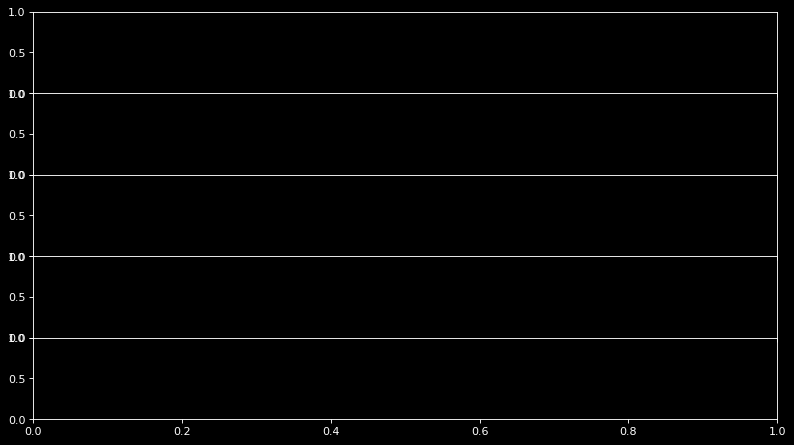

In [4]:
plt.style.use('dark_background')

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(12,6.75), dpi=80)
fig.subplots_adjust(hspace=0)

def draw_fig():
    t = np.arange(30)
    axs[0].clear()
    axs[1].clear()
    axs[2].clear()
    axs[3].clear()
    axs[4].clear()
    axs[0].set_yticks(np.arange(0, 101, 50))
    axs[0].set_ylim(-10, 110)
    axs[0].set(ylabel="CPU0")
    axs[1].set_yticks(np.arange(0, 101, 50))
    axs[1].set_ylim(-10, 110)
    axs[1].set(ylabel="CPU1")
    axs[2].set_yticks(np.arange(0, 101, 50))
    axs[2].set_ylim(-10, 110)
    axs[2].set(ylabel="CPU2")
    axs[3].set_yticks(np.arange(0, 101, 50))
    axs[3].set_ylim(-10, 110)
    axs[3].set(ylabel="CPU3")
    axs[4].set_yticks(np.arange(15, 21, 2))
    axs[4].set_ylim(14, 21)
    axs[4].set(ylabel="Power (W)")

    axs[0].plot(t, results[0][-30:])
    axs[1].plot(t, results[1][-30:])
    axs[2].plot(t, results[2][-30:])
    axs[3].plot(t, results[3][-30:])    
    axs[4].plot(t, results[4][-30:], 'r')
    
    fig.canvas.draw()
    buf = fig.canvas.buffer_rgba()
    frame[:] = np.frombuffer(buf, dtype='u1')

This loop runs every 2 seconds or so and updates the graph being drawn. The most complicated aspect is calculating the current CPU usage from the total time each processor has spent idle

In [ ]:
prev = None
prev_timestamp = None
results = [[0 for _ in range(30)] for _ in range(5)]
while True:
    times = psutil.cpu_times(percpu=True)
    timestamp = time.time()
    if prev is not None:
        period = timestamp - prev_timestamp
        diff = [(1 - (times[i].idle - prev[i].idle) / period) * 100 for i in range(4)]
        for i in range(4):
            results[i].append(diff[i])
        # Append the current power measurement
        results[4].append(rail.power.value)
    time.sleep(1)
    draw_fig()
    prev = times
    prev_timestamp = timestamp

The `pynq.get_rails()` function returns a dictionary of all rails in the systems. The default string representation will print the available sensors for each rail. The ZCU104 has voltage, current and power measurement on 10 rails in total

In [6]:
pynq.get_rails()

{'12V': Rail {name=12V, voltage=Sensor {name=12V_voltage, value=11.98V}, current=Sensor {name=12V_current, value=1.425A}, power=Sensor {name=12V_power, value=17.075W}},
 '1V13': Rail {name=1V13, voltage=Sensor {name=1V13_voltage, value=1.128V}, current=Sensor {name=1V13_current, value=0.468A}, power=Sensor {name=1V13_power, value=0.5W}},
 '1V2': Rail {name=1V2, voltage=Sensor {name=1V2_voltage, value=1.195V}, current=Sensor {name=1V2_current, value=0.5A}, power=Sensor {name=1V2_power, value=1.03125W}},
 '1V8': Rail {name=1V8, voltage=Sensor {name=1V8_voltage, value=1.796V}, current=Sensor {name=1V8_current, value=0.312A}, power=Sensor {name=1V8_power, value=0.5625W}},
 '3V3': Rail {name=3V3, voltage=Sensor {name=3V3_voltage, value=3.304V}, current=Sensor {name=3V3_current, value=0.75A}, power=Sensor {name=3V3_power, value=2.25W}},
 '5V0': Rail {name=5V0, voltage=Sensor {name=5V0_voltage, value=5.0V}, current=Sensor {name=5V0_current, value=0.093A}, power=Sensor {name=5V0_power, value=0